# Задание

* Проведите базовый анализ данных и разработайте базовую модель (не забудьте оценить работу модели);
* Разберитесь и отобразите ROC-кривую с помощью `sklearn.metrics.roc_curve`;
* Оцените работу модели при использовании `StandartScaler`;
* Исследуйте работу модели `LogisticRegression` с изменением аргумента (3 изменения / различных значения) `iter` - объяснить, что происходит при установке значения по-умолчанию (значение взять из справки);
* Оцените работу модели при обучении на двух признаках (попробовать 2 пары признаков):
    - sepal length (cm) + sepal width (cm);
    - petal length (cm) + petal width (cm);
* Найдите лучшую пару признаков методом кросс-валидации на обучающих данных (перебрать все возможные пары);
* Освойте и изучите работу подхода классификации [**К ближайших соседей (KNN)**](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), продемонстрируйте работу и основную суть метода, сравните с показателями логистической регрессии;
* Оцените влияние аргумента `n_neighbors` на работу модели KNN (7 различных значений); постройте график или таблицу основных показателей метрик от значения количества соседей;
* Отобразите **плоскость решений** при использовании двух признаков как лучшей модели логистической регрессии, так и лучшей модели KNN;
* (Для особо интересующихся) Почитайте про принцип работы метода [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) (Support Vector Machine), сравните [линейный тип SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) модели с остальными.


# **Для начала импортируем все нужные модули и загрузим данные.**

In [1]:
# Импорт необходимых модулей 
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Настройки для визуализации
# Если используется темная тема - лучше текст сделать белым
TEXT_COLOR = 'black'

matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['axes.labelcolor'] = TEXT_COLOR
matplotlib.rcParams['xtick.color'] = TEXT_COLOR
matplotlib.rcParams['ytick.color'] = TEXT_COLOR

# Зафиксируем состояние случайных чисел
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

**Загрузим данные**

In [2]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(iris_data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
# именно эти классы мы должны определить по 4 признакам, приведенным выше
print(iris_data['target_names'])

['setosa' 'versicolor' 'virginica']


Переведем данные в удобный табличный формат DataFrame

In [4]:
feature_names = iris_data['feature_names']
df = pd.DataFrame(iris_data['data'], columns=feature_names)
species_names = iris_data['target_names']
target_idxs = iris_data['target']
df['species'] = species_names[target_idxs]
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Оценим численные показатели признаков

In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Посмотрим как распределены данные

In [7]:
df.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

Данные распределены равномерно, это хорошо.

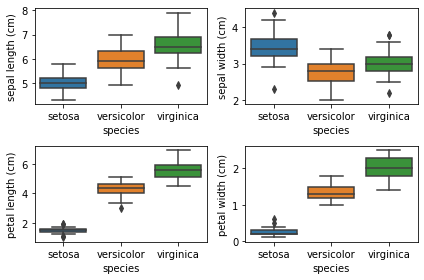

In [8]:
fig, axs = plt.subplots(2, 2)

for i, feat_name in enumerate(feature_names):
    row = i//2
    col = i%2
    sns.boxplot(x = 'species', y = feat_name, data = df, order = species_names, ax = axs[row, col]);
    
fig.tight_layout();

Видно, что для цветка setosa, два признака (petal width и length) сильно отличаются от двух остальных - по этим значениям этих признаков легко будет понять, что конкретный цветок - setosa.

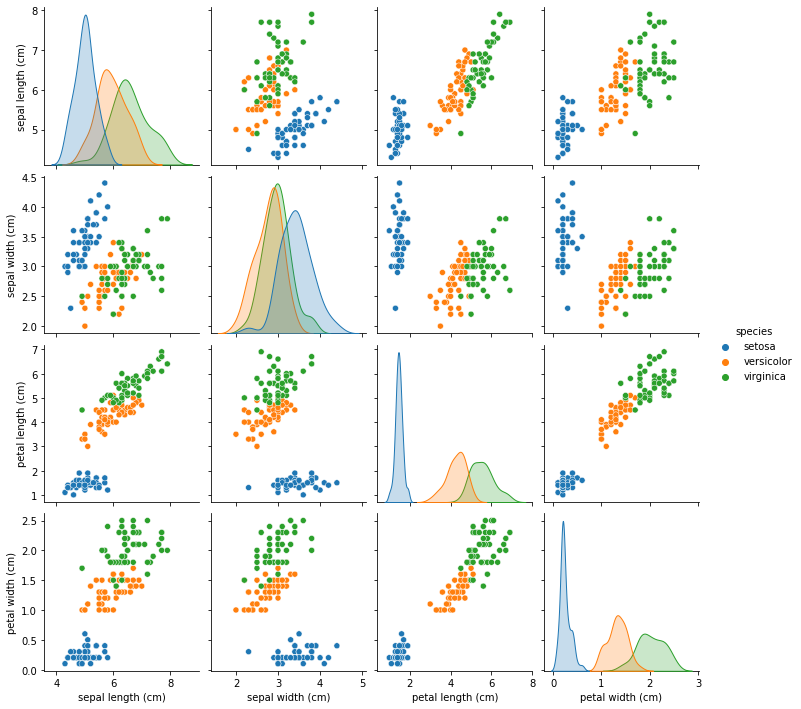

In [9]:
sns.pairplot(df, hue='species')

Это можно заметить и здесь.

# Разработка модели

Разбиваем на обучающую и тренировочную выборки.

In [10]:
from sklearn.model_selection import train_test_split

TRAIN_RATIO = 0.7

X = df[feature_names]
y = target_idxs

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    train_size=TRAIN_RATIO, 
    random_state=RANDOM_STATE,
    stratify=y
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(105, 4) (105,)
(45, 4) (45,)


Созддаем объект модели и обучим ее.

In [11]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(
    random_state=RANDOM_STATE,
    max_iter=200,
    multi_class='multinomial'
)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Посмотрим, как модель классифицирует данные.

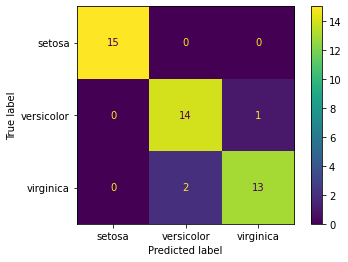

In [12]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(
    logreg, X_test, y_test,
    display_labels=species_names)

Как и было сказано ранее, сетосу действительно довольно легко предсказать, в остальных классификациях есть ошибки.

In [13]:
from sklearn.metrics import classification_report

y_pred = logreg.predict(X_test)
report = classification_report(
    y_test, y_pred, 
    target_names=species_names
)

print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



Текущая точность предсказания - 93%. 

In [14]:
sample = X_train.iloc[0:10]

prediction = logreg.predict(sample)
predict_proba = logreg.predict_proba(sample)
predict_log_proba = logreg.predict_log_proba(sample)

print(f'  Sample:\n{sample}')
print(f'  Prediction proba:\n{predict_proba}')
print(f'  Prediction log proba:\n{predict_log_proba}')
print(f'  Prediction:\n{prediction}')
print(f'  Prediction name:\n{species_names[prediction]}')



  Sample:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
98                 5.1               2.5                3.0               1.1
68                 6.2               2.2                4.5               1.5
19                 5.1               3.8                1.5               0.3
143                6.8               3.2                5.9               2.3
99                 5.7               2.8                4.1               1.3
145                6.7               3.0                5.2               2.3
9                  4.9               3.1                1.5               0.1
46                 5.1               3.8                1.6               0.2
8                  4.4               2.9                1.4               0.2
102                7.1               3.0                5.9               2.1
  Prediction proba:
[[2.71528633e-01 7.26334123e-01 2.13724377e-03]
 [2.90726596e-03 8.15493374e-01 1.81599360e-01]
 [9.79603661e-01

Модель практически всегда (93%) правильно определяет класс цветка, однако все же постараемся повысить ее точность.

Кроме того, для оценки используют функцию  cross_val_score

In [15]:
from sklearn.model_selection import cross_val_score

X = df[feature_names]
y = target_idxs

# Данная функция используется только для оценки 
#   (она обучает модель внутри, но не возвращает ее)

scores = cross_val_score(
    logreg,     # Модель для оценки
    X,          # Данные для обучения
    y,          # Разметка для обучения
    cv=5,       # Количество фолдов
    scoring='f1_macro'  # Желаемая метрика
)
print(f'Scores: {scores}')
print(f'F1 (macro): {scores.mean(): 0.2f} (+/- {scores.std() * 2: 0.2f})')

Scores: [0.96658312 1.         0.93265993 0.96658312 1.        ]
F1 (macro):  0.97 (+/-  0.05)


## Отобразим ROC-кривую

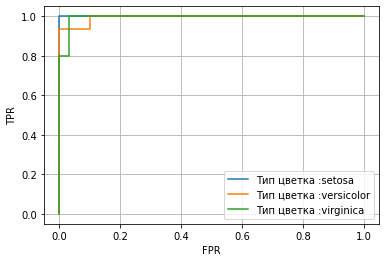

In [16]:
from sklearn import metrics
#
y_pred_proba = logreg.predict_proba(X_test)

for i in range(np.max(y)+1):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba[:,i],pos_label=i)
    plt.plot(fpr, tpr,label = f'Тип цветка :{species_names[i]}')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.grid(True)
    plt.legend()
    
fig.tight_layout();

 По оси x - ложно полодительные предсказания, по оси y - истинно положительные. Выходит, что чем больше площадь под графиком - тем точней предсказание. Как видно, у setosa площадь максимальна - ошибок нет, у vitginica и versicolor есть ложноположительные предсказания, причем видно, что у vigrinica их больше.

## Используем StandartScaler

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# обучаем трансофрмера
scaler.fit(X_train)

# приводим данные к новому "StandartScaler" - виду
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# обучаем модель на новых данных
logreg.fit(X_train_scaled , y_train)
y_pred = logreg.predict(X_test_scaled )

# посмотрим, что с метриками
report = classification_report(
    y_test, y_pred, 
    target_names=species_names
)

print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.87        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



Метрики чуть ухудшились.

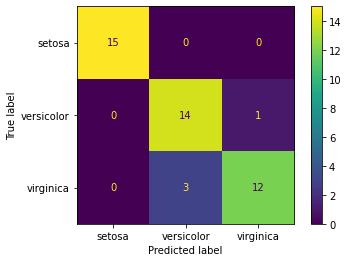

In [18]:
disp = plot_confusion_matrix(
    logreg, X_test_scaled, y_test,
    display_labels=species_names)

Действительно, метод не помог, ложных предсказаний для верджиники больше.

## **Исследуем работу модели LogisticRegreccion**

In [19]:
vals = [5, 50, 100, 200]
for i in vals:
  reg = LogisticRegression(
  random_state=RANDOM_STATE,
  max_iter=i,
  multi_class='multinomial'
  )
  reg.fit(X_train, y_train)

  y_pred = reg.predict(X_test)
  report = classification_report(
    y_test, y_pred, 
    target_names=species_names
  )
  print(f'----------------------max_iter={i}------------------')
  print(report) 
  



----------------------max_iter=5------------------
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.50      1.00      0.67        15
   virginica       0.00      0.00      0.00        15

    accuracy                           0.67        45
   macro avg       0.50      0.67      0.56        45
weighted avg       0.50      0.67      0.56        45

----------------------max_iter=50------------------
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.93      0.93      0.93        15
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

----------------------max_iter=100------------------
              precision    recall  f1-score   support

      setosa       1.00    

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIO

При низком значении итераций точность становится маленькой, при повышении итераций точность возрастает. Однако после значения по умолчанию (=100) точность немного падает (возможно, особенность данных),а затем остается на одном уровне (не меняется при max_iter>100).

## Применим обучение по двум признакам.

1. sepal length (cm) + sepal width (cm)

Меняются только используемые признаки, поэтому удалим ненужные

In [20]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
98,5.1,2.5,3.0,1.1
68,6.2,2.2,4.5,1.5
19,5.1,3.8,1.5,0.3
143,6.8,3.2,5.9,2.3
99,5.7,2.8,4.1,1.3


In [21]:
X_train_new = X_train.iloc[:,[0,1]]
X_train_new.head()

,sepal length (cm),sepal width (cm)
98,5.1,2.5
68,6.2,2.2
19,5.1,3.8
143,6.8,3.2
99,5.7,2.8


In [22]:
X_test_new = X_test.iloc[:,[0,1]]
X_test_new.head()

,sepal length (cm),sepal width (cm)
107,7.3,2.9
63,6.1,2.9
133,6.3,2.8
56,6.3,3.3
127,6.1,3.0


In [23]:
logreg.fit(X_train_new, y_train)

y_pred = logreg.predict(X_test_new)
report = classification_report(
  y_test, y_pred, 
  target_names=species_names
  )
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.60      0.60      0.60        15
   virginica       0.60      0.60      0.60        15

    accuracy                           0.73        45
   macro avg       0.73      0.73      0.73        45
weighted avg       0.73      0.73      0.73        45



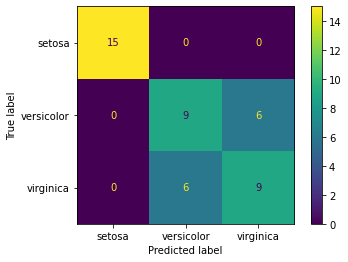

In [24]:
disp = plot_confusion_matrix(
    logreg, X_test_new, y_test,
    display_labels=species_names)

Классификатор стал предсказывать хуже, такая пара не подойдет.

2. petal length (cm) + petal width (cm)

In [29]:
X_train_new_new = X_train.iloc[:,[2,3]]
X_test_new_new = X_test.iloc[:,[2,3]]

In [30]:
logreg.fit(X_train_new_new, y_train)

y_pred = logreg.predict(X_test_new_new)
report = classification_report(
  y_test, y_pred, 
  target_names=species_names
  )
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



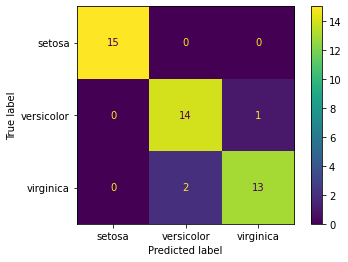

In [31]:
disp = plot_confusion_matrix(
    logreg, X_test_new_new, y_test,
    display_labels=species_names)

Результат классификации такой же, как для базовой модели без применения различных модификаций. Значит, действительно можно проводить анализ по этим двум признакам.

## Найдем лучшую пару признаков

In [97]:
# определим число признаков
col = X_train.shape[1]
for i in range(0,col,1):
  for j in range(i+1,col,1): # берем не 4 признака, а 3
  
    X_train_mix = X_train.iloc[:,[i,j]]
    X_test_mix = X_test.iloc[:,[i,j]]
    logreg.fit(X_train_mix, y_train)
    y_pred = logreg.predict(X_test_mix)
    report = classification_report(
    y_test, y_pred, 
    target_names=species_names
    )
    print('---------------------------------------')
    print(f'{feature_names[i]} + {feature_names[j]}')
    
    print(report) 

    scores = cross_val_score(
    logreg,     # Модель для оценки
    X.iloc[:,[i,j]],   
    y,          # Разметка для обучения
    cv=5,       # Количество фолдов
    scoring='f1_macro'  # Желаемая метрика
    )
    print(f'Scores: { scores  }')
    print('-----------ПОКАЗАТЕЛЬ F1-----------')
    print(f'F1 (macro): {scores.mean(): 0.2f} (+/- {scores.std() * 2: 0.2f})')
    

---------------------------------------
sepal length (cm) + sepal width (cm)
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.60      0.60      0.60        15
   virginica       0.60      0.60      0.60        15

    accuracy                           0.73        45
   macro avg       0.73      0.73      0.73        45
weighted avg       0.73      0.73      0.73        45

Scores: [0.72222222 0.82949702 0.76608187 0.86666667 0.86807706]
-----------ПОКАЗАТЕЛЬ F1-----------
F1 (macro):  0.81 (+/-  0.12)
---------------------------------------
sepal length (cm) + petal length (cm)
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighte

Лучшие показатели дает сочетание petal lenght + petal width, как уже было предоложено ранее.

## Применим подход KNN

Суть подхода заключается в том, что он использует сходство признаков для прогнозирования новых данных. Объект присваивается тому классу, который является наиболее распространенным среди k - соседей данного элемента, которые уже классифицированы. Относится к "ленивым алгоритмам" - то есть начинает работу уже на тестовой выборке, а в тренировочной просто запоминает результат.

In [95]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)
report = classification_report(
    y_test, y_pred, 
    target_names=species_names
)

print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



По сравнению с исходной моделью  показатели качества улучшились!
## пронаблюдаем зависимость

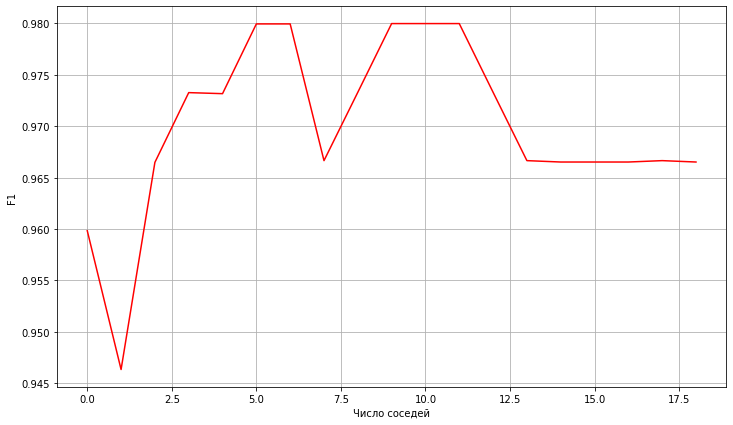

In [169]:
f1 = []
for i in range(1,20,1):
  neigh = KNeighborsClassifier(n_neighbors=i)
  scores = cross_val_score(
    neigh,     # Модель для оценки
    X,   
    y,          # Разметка для обучения
    cv=5,       # Количество фолдов
    scoring='f1_macro'  # Желаемая метрика
    )
  f1.append(scores.mean())
  
plt.figure(figsize=(12, 7))
plt.plot(f1,'r')
plt.xlabel('Число соседей')
plt.ylabel('F1')
plt.grid()

По графику видно, что оптимальное число соседей составляет 5,6,9,10,11. При значениях больше 11 заметен спад метрики F1, хоть и незначительный (вместо 0.98 стало 0.96). Данный подход в условиях этой задачи пригоден для улучшения классификации.

## Отобразить плоскость решений

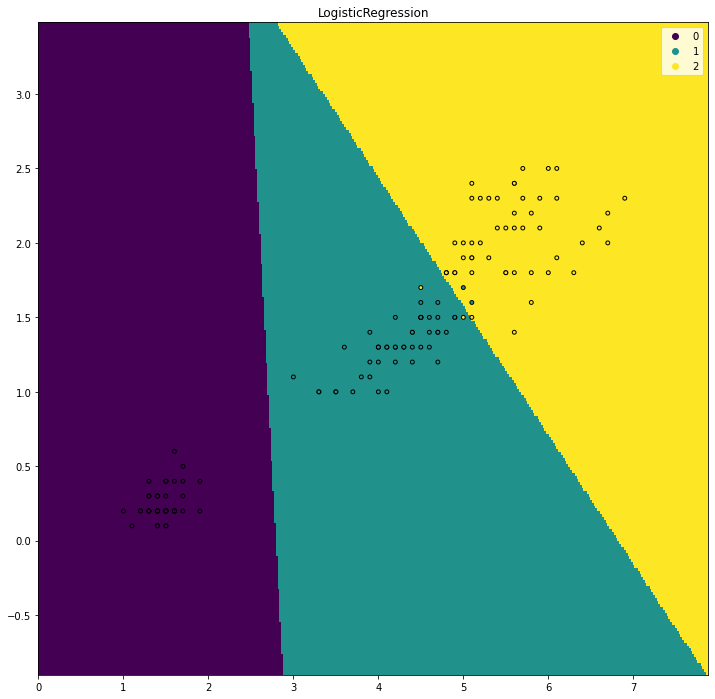

In [158]:
from matplotlib.colors import ListedColormap

X_best = iris_data.data[:,[2,3]]# лучшая пара признаков

logreg = LogisticRegression(
    random_state=RANDOM_STATE,
    max_iter=200,
    multi_class='multinomial'
)

logreg.fit(X_best,y)

x_min, x_max = X_best[:, 0].min() - 1, X_best[:, 0].max() + 1
y_min, y_max = X_best[:, 1].min() - 1, X_best[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

y_pred = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
y_pred = y_pred.reshape(xx.shape)
plt.figure(figsize=(12, 12))
plt.pcolormesh(xx, yy, y_pred)
pnts = plt.scatter(X_best[:, 0], X_best[:, 1], c=y,
            edgecolor='k', s=15)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend(handles=pnts.legend_elements()[0], labels=['0', '1','2'])
plt.title('LogisticRegression')
plt.show()

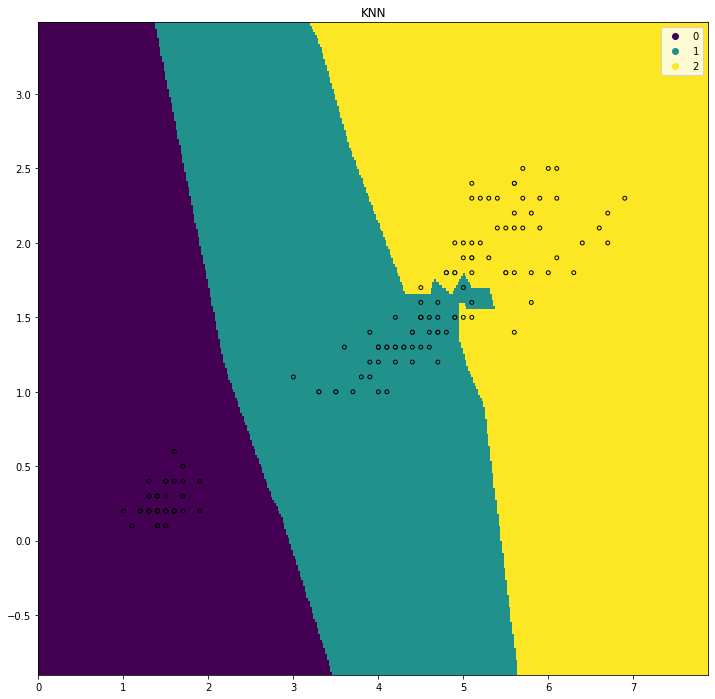

In [170]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_best, y)

x_min, x_max = X_best[:, 0].min() - 1, X_best[:, 0].max() + 1
y_min, y_max = X_best[:, 1].min() - 1, X_best[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

y_pred = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
y_pred = y_pred.reshape(xx.shape)
plt.figure(figsize=(12, 12))
plt.pcolormesh(xx, yy, y_pred)
pnts = plt.scatter(X_best[:, 0], X_best[:, 1], c=y,
            edgecolor='k', s=15)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend(handles=pnts.legend_elements()[0], labels=['0', '1','2'])
plt.title('KNN')
plt.show()

Как ни странно, для этой выборки (берем только 2 столбца признаков с petal width и petal length) лучшим оказалось значение соседей  = 1.

# Вопросы


* Почему массив весов имеет размер 3х4, а массив смещений - 3 элемента в модели логистической регрессии?

Ответ: массив весов имеет размер 3 - количество классов 4 - количество признаков. Массив смещений определяет принадлежность классу.  
* В чем различия методов усреднения статистики `macro`, `micro` и `weighted`?

Ответ: Micro - глобально (все TP, FP и FN), macro - для каждого значения без учета дисбаланса данных, weighted - с учетом дисбаланса.
* Что означает `support` в отчете классификации?

Ответ: число объектов (размер выборки)
* Продемонстрируйте расчет показателей `recall` и `precision` одного из классов по любой из CM.
* Что происходит при использовании аргумента `stratify` при разделении на выборки? Что будет, если не использовать данный аргумент? 

Ответ: stratify используется для указания пропорций для классов в выборке. Если не использовать, в выборке может не оказаться одного из классов.
* В чем разницах подходов обучения модели линейной регрессии и логистичесой регрессии?

Ответ: линейная регрессия работает для определения значения нового объекта по набору данных, а логистическая регрессия присвает объекту определенный класс из заранее известного набора классов, причем один. Принципиальная разница в том, что веса в логистической регрессии служат в качестве степени уверенности для определенного класса, а в линейно - веса умножаются на значения признаков и складываются.

* На основе чего работает метод KNN?

Ответ: Суть подхода заключается в том, что он использует сходство признаков для прогнозирования новых данных. Объект присваивается тому классу, который является наиболее распространенным среди k - соседей данного элемента, которые уже классифицированы.

* Как влияет количество соседей на работу модели? 

Ответ: изменение количества соседей меняет границы плосоксти решений. Для каждой модели надо проверять зависимость отдельно.
* В чем отличие кросс-валидации от разделения на выборки обучения/валидации/теста? Для чего применяется выборка обучения? Валидации? А теста?

class 2: recall = 0.8666666666666667; precision  =0.9285714285714286


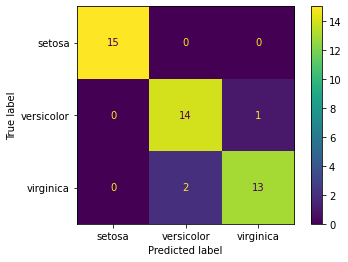

In [176]:
    
from sklearn.metrics import plot_confusion_matrix
logreg = LogisticRegression(
    random_state=RANDOM_STATE,
    max_iter=200,
    multi_class='multinomial'
)
logreg.fit(X_train,y_train)
Z = plot_confusion_matrix(
    logreg, X_test, y_test,
    display_labels=species_names
)
i = 2
recall=Z.confusion_matrix[i,i]/(np.sum(Z.confusion_matrix[i,:]))
precision=Z.confusion_matrix[i,i]/(np.sum(Z.confusion_matrix[:,i]))
print(f'class {i}: recall = {recall}; precision  ={precision}')   